***
# Context
***

### Summary of this section
Before we get into NLP and LLM's, we need to go over the basics that preceed them.

## 1 - Perceptrons

#### Big Idea

_**Biological Context:**_
Modeled after the brain, perceptions are like neurons and synapses in the human brain. A high enough electrical current can activate neurons and send signals through the corresponding synapse.
Once the signal is sent, the neuron turns off. Higher number of activations strengthens the neurons and becomes more important. 
The way all the neurons connect with each other with its varying strengths of connections can help us respond to external stimuli though some kind of output.

_**ML Adaptation:**_
Taking an input vector, the perceptions multiplies it by a weight vector and adds it to a bias to get a vector, which will be normalized/squashed by an activation function to get some kind of output scalar. The output scalar can represent anything from probability of something happening or a prediction of a large value.

The bias represents how trigger happy a neuron is. The higher the bias, the more likely the values of the output vector are higher/activated.

#### Representation

You can think of an inputs of a perceptron as a bunch of data that can have some kind of unknown relationship with each other. The perception takes note of all this data and from previous experiences assigns importance to different inputs. The perception then weighs everything before making some kind of judgement and outputs a judgement.

For example - lets say your input is a bunch of features of a house like sqrt feet or number of bathrooms. The perception then multiplies each of these features by different weights (importance) before adding them up. The perception then normalizes this sum to get a value between 0 and 1 through the activation sum. The resulting scalar could represent the probabiltiy of a "good buy."


#### Mathematical Basis

The following is an example of the flow of a perceptron.

In [8]:
import torch


# x is an example of an input vector that can be passed into a perceptron
x = torch.tensor([1.0, 2.0, 3.0])

# w is an example of a weight vector that can be passed into a perceptron
w = torch.tensor([0.1, 2, 0.3])

# b is an example of a bias that can be passed into a perceptron
b = torch.tensor(0.5)

# The weighted sum of the input vector and the weight vector is calculated and then added to the bias
z = torch.matmul(x, w.T) + b

# The output of the perceptron is calculated by passing the weighted sum through an activation function
def activation(z):
    return torch.sigmoid(z)

# The output of the perceptron is calculated
output = activation(z)

print(output)

tensor(0.9959)


We go from a 1x3 matrix x, multiplying it by a 3x1 matrix w.T (transpose), and pass the resulting scalar through an activation function to get an output.

#### Backpropagation

1. How do we get the right output?

We need to train our perceptron so that we adjust the weights to get the output that we want as that is the only thing that we can adjust.

2. How do we determine which weights to change and by how much?

Lets say we get an output of 1. However, empirically the output should be 0. We need to calculate the culpability of the current weights and use the culpabiltiy factor to change the wrong weights towards something that could be more right. aka change the weights towards something that would give us an output of 0.

3. What does this look like?

Will implement in the perceptron notebook.


***__Basic Idea of Back Prop__***:

If my perceptron output is $y$, then we can write $y$ as a function of the input and weights, $x$ and $w$.

$$ f(x,w) = y$$

During training, lets say our test output is $y_t$ and our training output is $y_h$.

How off we are can be written as a loss function
$$L2(y_t,y_h) = (y_t-y_h)^2$$

This is the L2 loss. There are other forms of loss like the L1 loss.

$$L1(y_t,y_h) = |y_t-y_h|$$

With each training example that we expose the model to, we should expect to move our weights based on how off we are, which is the magnitude of our loss. How much each individual weight should be move also depends on how much the weight contributed to the error.

Our adjusted weight thus is as follows: 

$$ w_a = w - \eta* \frac{\mathrm{d}L}{\mathrm{d}w}$$

Since $w$ only affects $y_h$, we can rewrite this as 

$$w_a = w - \eta* \frac{\mathrm{d}L}{\mathrm{d}w} = w - \eta* \frac{\mathrm{d}L}{\mathrm{d}y_h} * \frac{\mathrm{d}y_h}{\mathrm{d}w}$$

Lets build a bit of intuition. If $y_h$ is close to $y_t$, then the loss function is closs to 0. Then $\frac{\mathrm{d}L}{\mathrm{d}y_h}$ would also be close to 0 with L2. In the case of L1 loss, it would be 1 or -1. This means that smaller loss is treated the same as larger loss in terms of how much to move the weights with L1.

We can then expect that L1 loss is more robust to outliers. On the other hand, L2 loss changes the weights proportionally to the loss. $\frac{\mathrm{d}L}{\mathrm{d}y_h} = 2*(y_t-y_h)$.

The other factor $\frac{\mathrm{d}y_h}{\mathrm{d}w}$, gives us a gradient vector of how much our training output is affected by each weight. This in context is the culpability of each weight.

$\eta$ is the learning rate. This could be a constant, but generally this is a function of how many training samples we've already trained. This is to keep the relevance of old training samples so that learning from new training samples don't overide the progress from old samples.

All together, our $\Delta w$ is a product of the magnitude of loss, the gradient of weights, and the learning rate.

We can calculate the derivative of $\frac{\mathrm{d}y_h}{\mathrm{d}w}$ through the chain rule. In more complicated networks, we do this through AutoGrad.

#### Activation Functions


Choice in activation function can affect the function of your perceptron and the overall NN that it will be part of.

Here are some different activation functions and their considerations.

___**Sigmoid**___: This function is defined by 

$$ f(x) = \frac{1}{1+\exp(-x)}$$

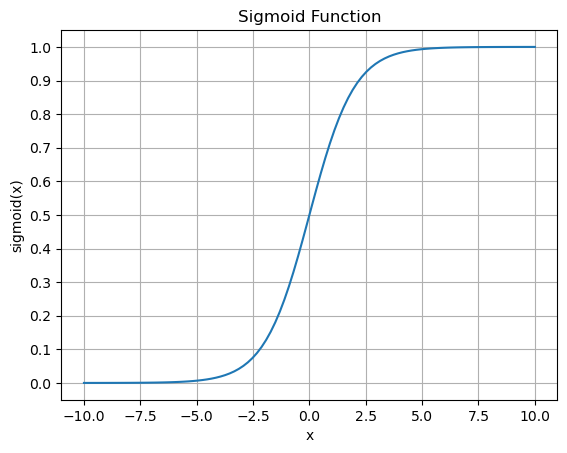

In [15]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10,10, 100)
y = 1/(1 + np.exp(-x))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid()
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.plot(x, y)

As we can see from the graph and the equation, this function is bounded between 0 and 1. Furthermore, the derivative for any x is positive.

The former property does a good job in normalizing outputs. It also may have some kind of probailistic meaning. The latter makes convergence towards any value smooth and consistent.

___**tanh**___: This function is defined by:

$$ f(x) = \frac {\exp(x)-\exp(-x)}{\exp(x) + \exp(-x)}$$

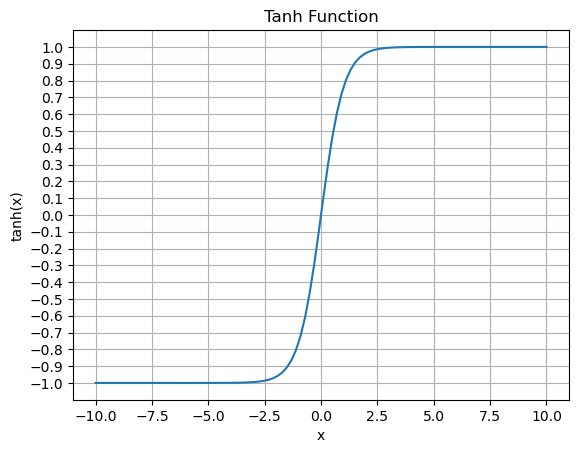

In [17]:
x = np.linspace(-10,10, 100)
y = np.tanh(x)
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.title('Tanh Function')
plt.grid()
plt.yticks(np.arange(-1, 1.1, step=0.1))
plt.plot(x, y)


Compared to sigmoid, the function has a range of (-1,1), which has a couple of implications.

1. Larger derivatives. When adjusting weights, we are multiplying the gradient of the weights with respect to the activation gradient. That means that 